Fig1b after updating to annotation 20220202

# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import os, re, gc, joblib
from pathlib import Path
import numpy as np
import numpy_groupies as npg
import pandas as pd

import anndata
import scanpy as sc
import sctk as sk

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
np.set_printoptions(linewidth=150)

rcParams["pdf.fonttype"] = 42
rcParams["ps.fonttype"] = 42

sc.settings.verbosity = 0
sk.set_figsize((4, 4))

In [3]:
from time import localtime, strftime


def timestamp(date_only=True):
    stamp_format = "%Y%m%d" if date_only else "%Y%m%d-%H%M"
    return strftime(stamp_format, localtime())

In [4]:
data_root = Path('/lustre/scratch126/cellgen/team205/nh3/skin').resolve()
proj_root = Path('~/FCA_Fetal_Skin_priv/').expanduser()
os.chdir(proj_root)
!pwd

/home/jovyan/FCA_Fetal_Skin_priv


# Load data

In [5]:
ad = sc.read(Path(data_root, "20210611_final_object/fetal_skin.norm.maternal_removed.20220202.h5ad"), backed="r")

In [6]:
ad

AnnData object with n_obs × n_vars = 186533 × 28885 backed at '/lustre/scratch126/cellgen/team205/nh3/skin/20210611_final_object/fetal_skin.norm.maternal_removed.20220202.h5ad'
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 

# Plot

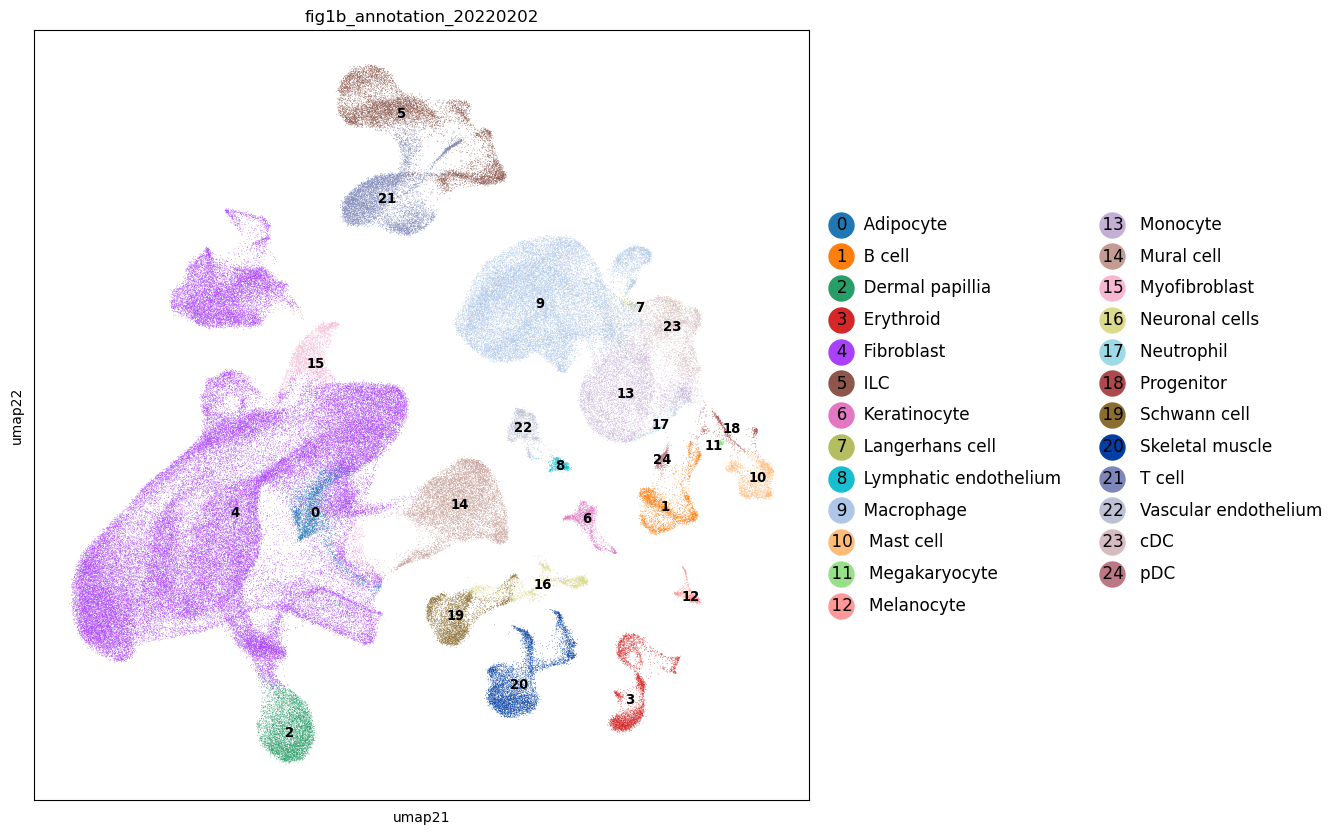

In [7]:
sk.plot_embedding(ad, basis="umap2", groupby="fig1b_annotation_20220202", figsize=(10, 10), size=1);

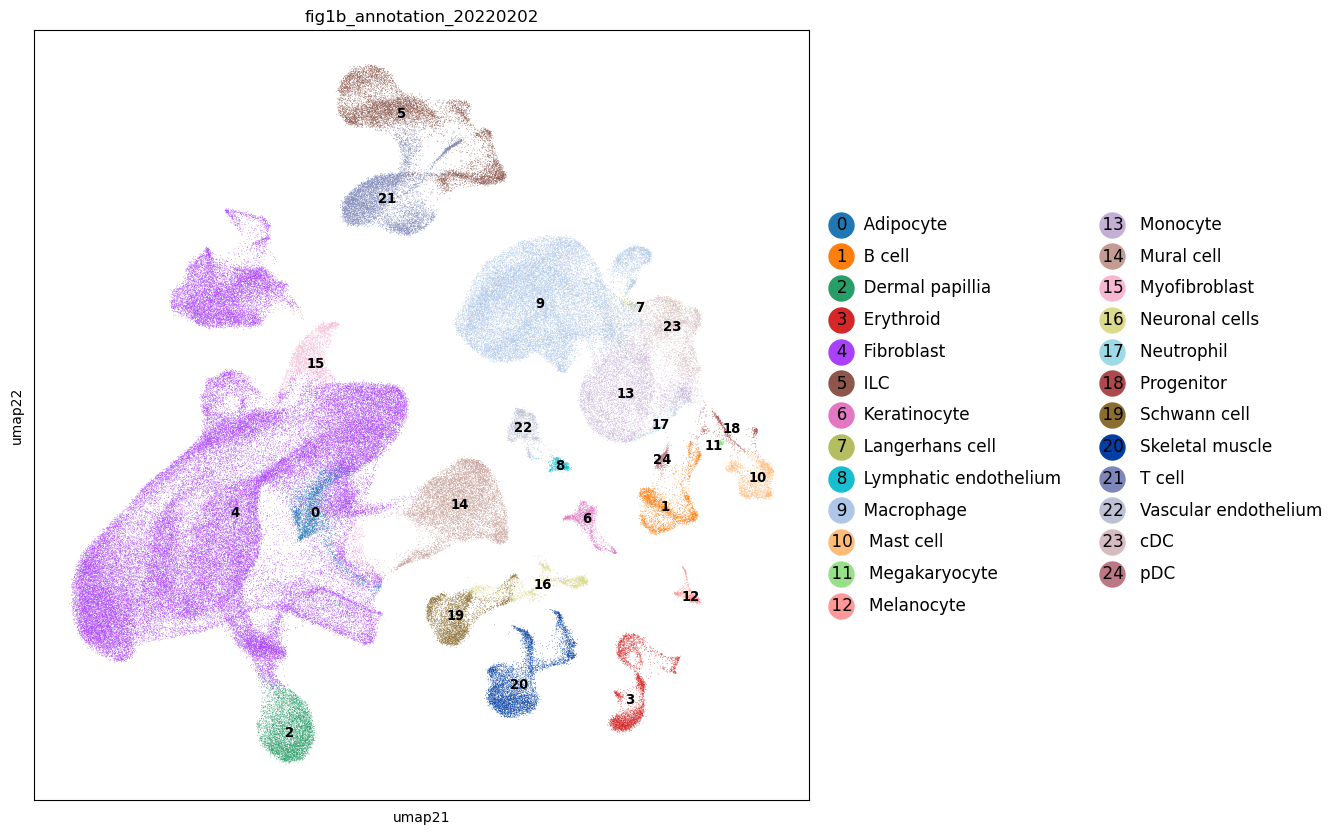

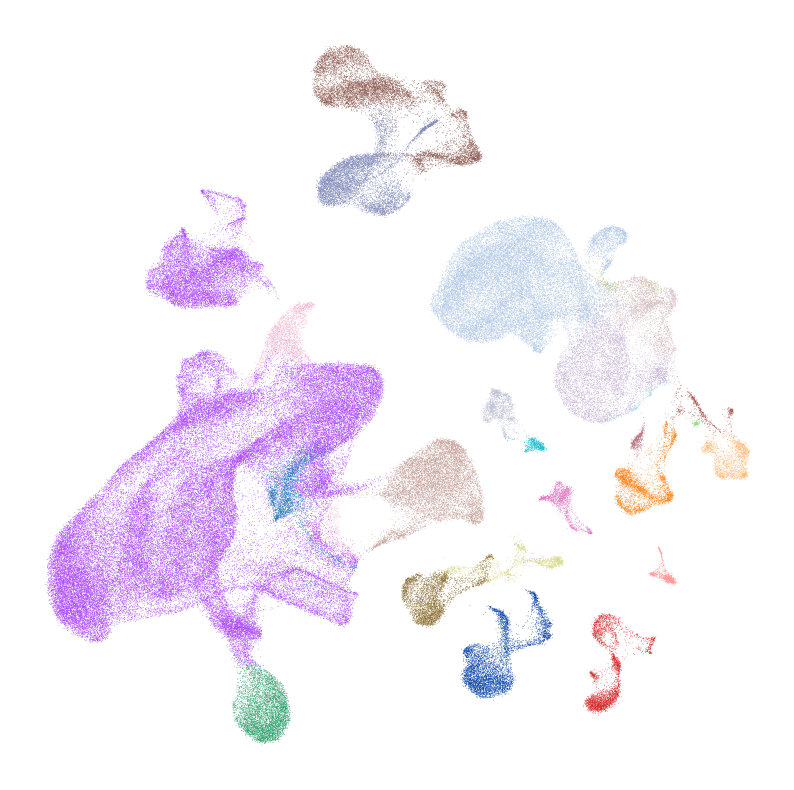

In [8]:
with PdfPages("figures/fig1B.pdf") as pdf:
    sk.plot_embedding(ad, basis="umap2", groupby="fig1b_annotation_20220202", figsize=(10, 10), size=1);
    pdf.savefig(bbox_inches="tight")
    sk.plot_embedding(ad, basis="umap2", groupby="fig1b_annotation_20220202", figsize=(10, 10), size=1, annot="none", frameon=False);
    pdf.savefig(bbox_inches="tight")